In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import seaborn as sns

In [3]:
df = pd.read_csv("data/filtered_countries.csv")
df = df.drop(columns=["Unnamed: 0"])
df

,country,country_code,year,HIV_total,HIV_new,ART_coverage_pct,chlamydia_cases,syphilis_cases,prep_users_cumulative
0,Australia,AUS,2010,20000.0,1000.0,62.0,NaN,NaN,NaN
1,Australia,AUS,2011,21000.0,1000.0,65.0,NaN,NaN,NaN
2,Australia,AUS,2012,22000.0,1000.0,68.0,NaN,NaN,NaN
3,Australia,AUS,2013,23000.0,980.0,73.0,83819.0,1719.0,NaN
4,Australia,AUS,2014,24000.0,950.0,76.0,86799.0,2039.0,NaN
...,...,...,...,...,...,...,...,...,...
203,Zimbabwe,ZWE,2020,1300000.0,18000.0,88.0,NaN,NaN,27899.0
204,Zimbabwe,ZWE,2021,1300000.0,21000.0,89.0,NaN,NaN,59918.0
205,Zimbabwe,ZWE,2022,1300000.0,17000.0,93.0,NaN,NaN,143498.0
206,Zimbabwe,ZWE,2023,1300000.0,15000.0,94.0,NaN,NaN,256459.0


In [73]:
df_numerical = df[["HIV_total", "HIV_new", "ART_coverage_pct", "chlamydia_cases", "syphilis_cases", "prep_users_cumulative"]]

In [74]:
df['country'].unique()

array(['Australia', 'Burundi', 'Brazil', 'Cameroon', 'Ethiopia', 'Kenya',
       'Nigeria', 'Rwanda', 'Eswatini', 'Thailand', 'Uganda',
       'South Africa', 'Zambia', 'Zimbabwe'], dtype=object)

# Bivariate Analysis

## Numerical vs. Categorical variables

### Numerical variables per country

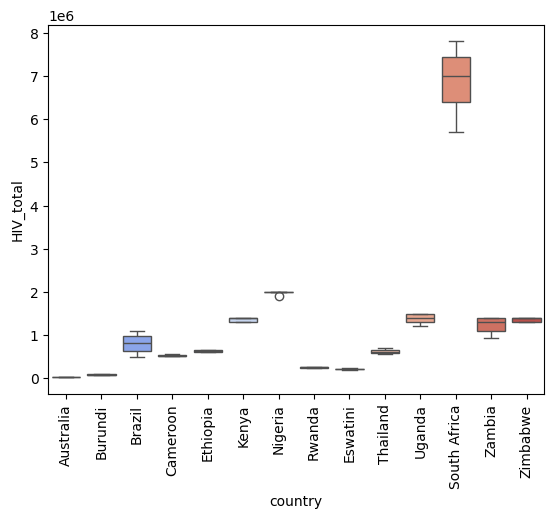

In [75]:
sns.boxplot(data=df, x="country", y="HIV_total", palette="coolwarm", hue=df["country"])
plt.xticks(rotation=90)
plt.show();

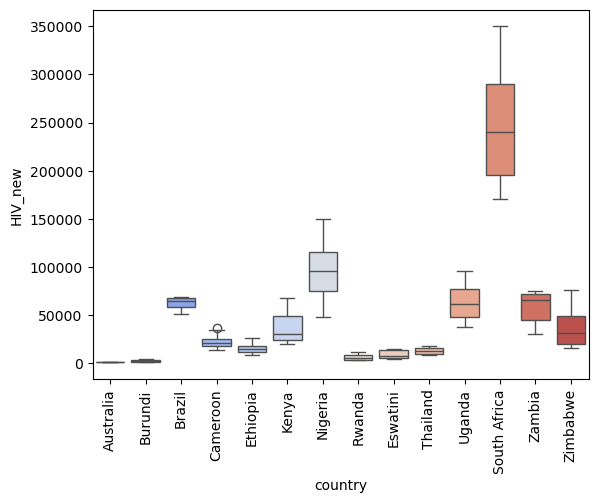

In [76]:
sns.boxplot(data=df, x="country", y="HIV_new", palette="coolwarm", hue=df["country"])
plt.xticks(rotation=90)
plt.show();

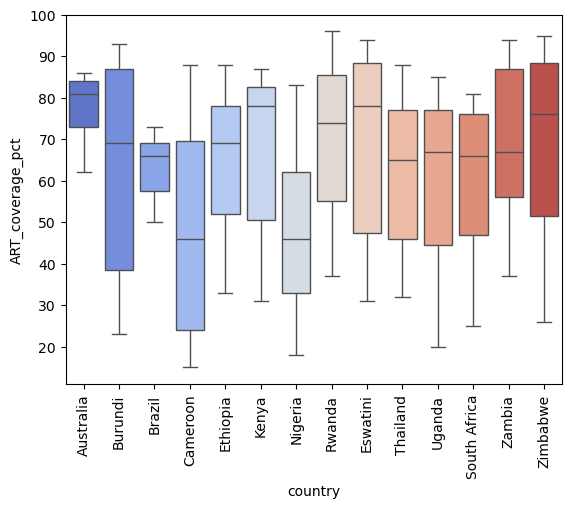

In [77]:
sns.boxplot(data=df, x="country", y="ART_coverage_pct", palette="coolwarm", hue=df["country"])
plt.xticks(rotation=90)
plt.show();

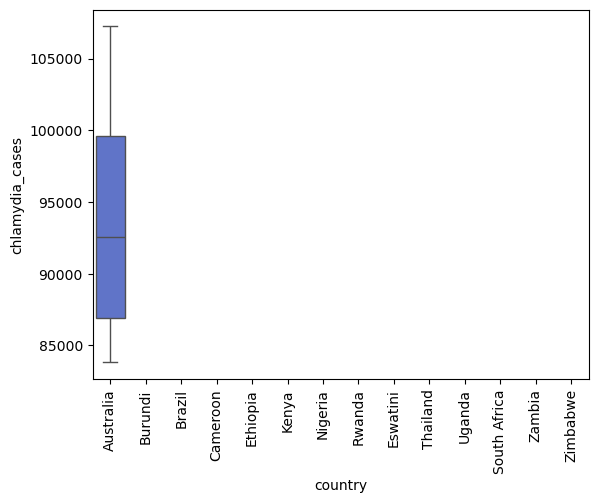

In [78]:
sns.boxplot(data=df, x="country", y="chlamydia_cases", palette="coolwarm", hue=df["country"])
plt.xticks(rotation=90)
plt.show();

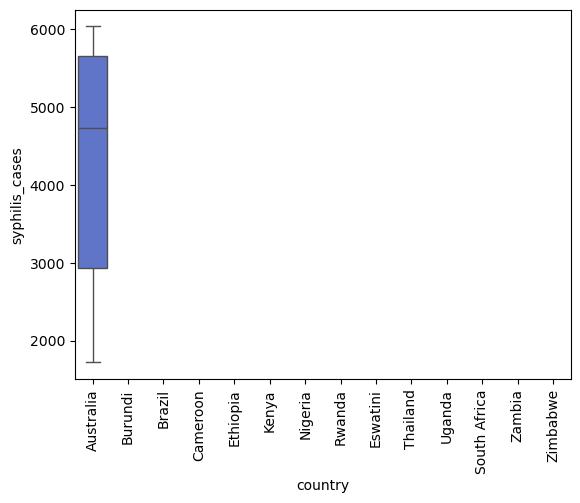

In [79]:
sns.boxplot(data=df, x="country", y="syphilis_cases", palette="coolwarm", hue=df["country"])
plt.xticks(rotation=90)
plt.show();

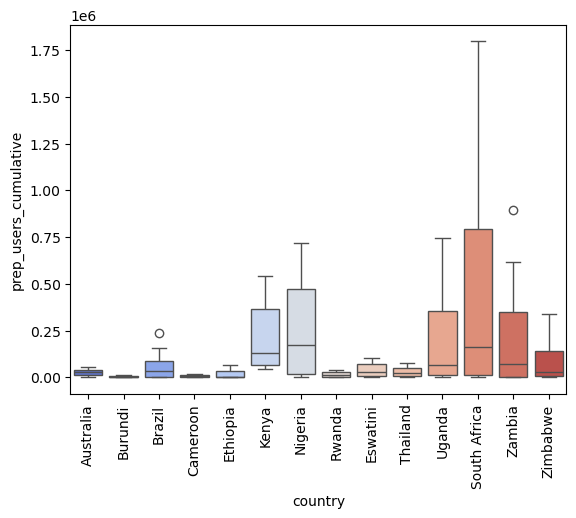

In [80]:
sns.boxplot(data=df, x="country", y="prep_users_cumulative", palette="coolwarm", hue=df["country"])
plt.xticks(rotation=90)
plt.show();

### Numerical variables per year

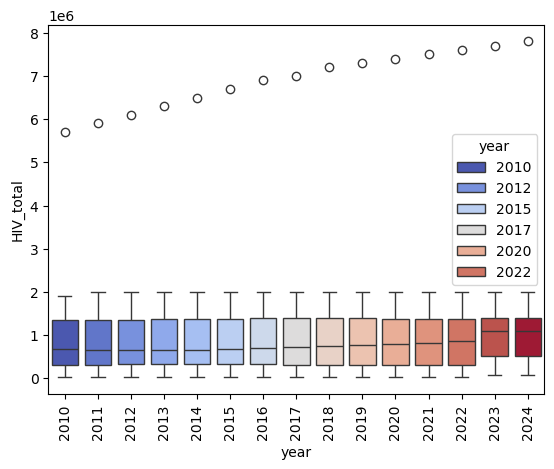

In [81]:
sns.boxplot(data=df, x="year", y="HIV_total", palette="coolwarm", hue=df["year"])
plt.xticks(rotation=90)
plt.show();

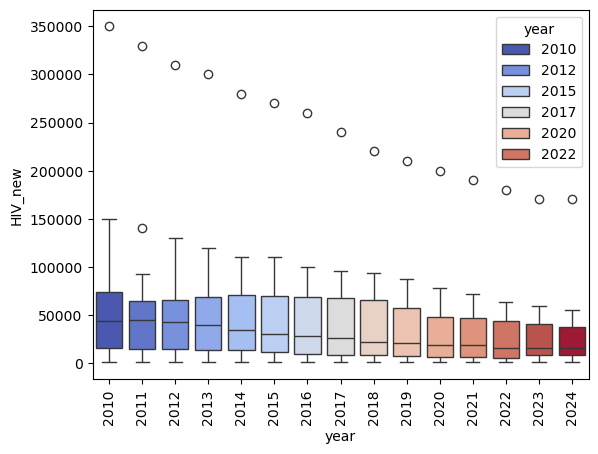

In [82]:
sns.boxplot(data=df, x="year", y="HIV_new", palette="coolwarm", hue=df["year"])
plt.xticks(rotation=90)
plt.show();

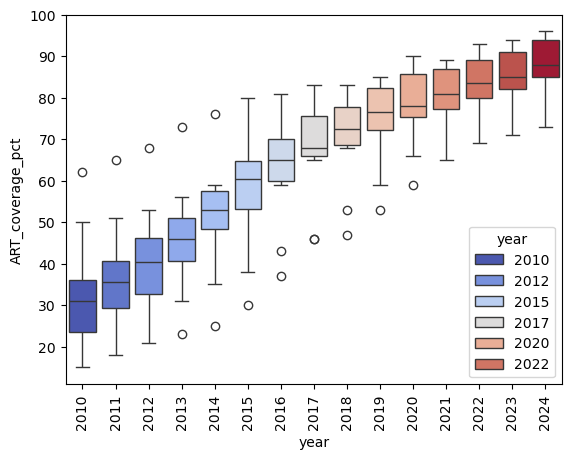

In [83]:
sns.boxplot(data=df, x="year", y="ART_coverage_pct", palette="coolwarm", hue=df["year"])
plt.xticks(rotation=90)
plt.show();

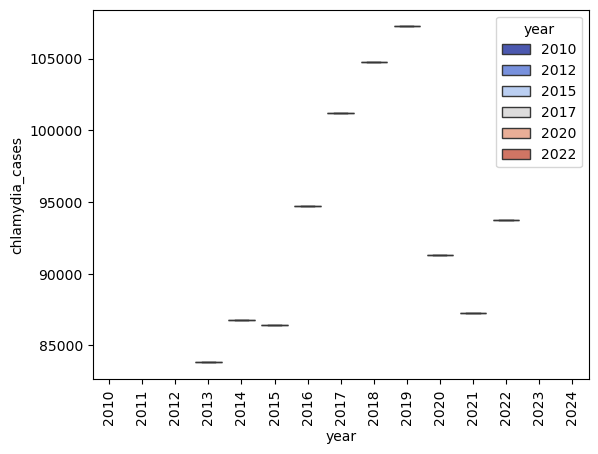

In [84]:
sns.boxplot(data=df, x="year", y="chlamydia_cases", palette="coolwarm", hue=df["year"])
plt.xticks(rotation=90)
plt.show();

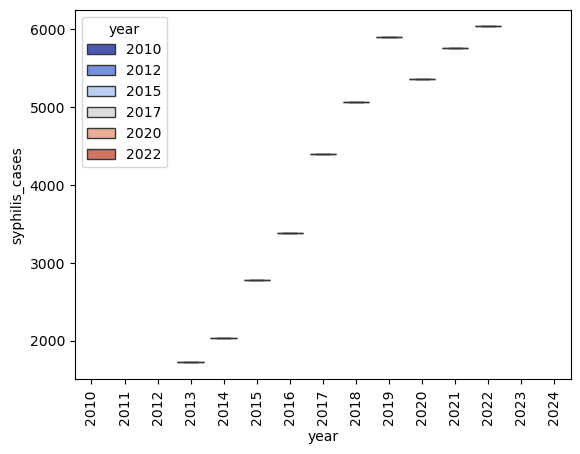

In [85]:
sns.boxplot(data=df, x="year", y="syphilis_cases", palette="coolwarm", hue=df["year"])
plt.xticks(rotation=90)
plt.show();

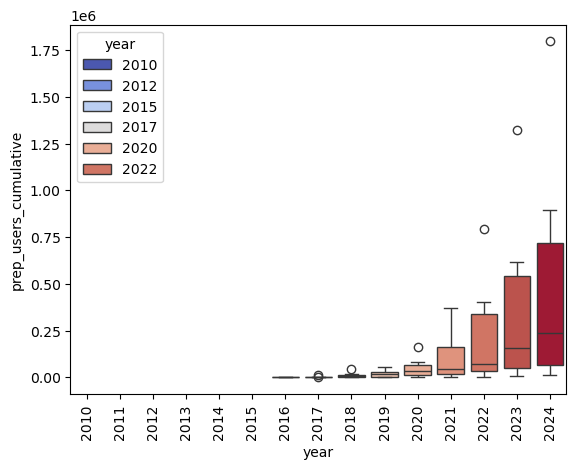

In [86]:
sns.boxplot(data=df, x="year", y="prep_users_cumulative", palette="coolwarm", hue=df["year"])
plt.xticks(rotation=90)
plt.show();

## Numerical vs. Numerical variables

In [87]:
# Calculating the Spearman correlation coefficients between 'SalePrice' and all other numerical variables
spearman_correlations = df_numerical.corrwith(df['prep_users_cumulative'], method='spearman')

# Sorting the correlations for better visualization
spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)

# Displaying the correlations
spearman_correlations_sorted

prep_users_cumulative    1.000000
syphilis_cases           0.892857
ART_coverage_pct         0.478568
HIV_total                0.347644
HIV_new                  0.150419
chlamydia_cases         -0.535714
dtype: float64

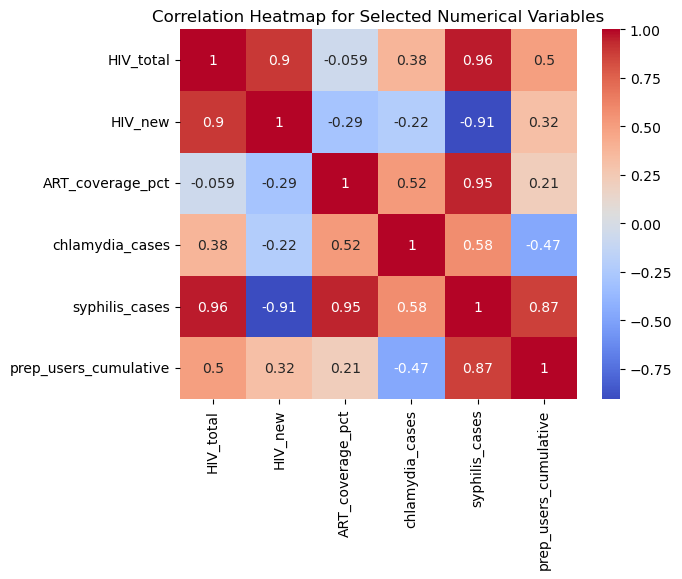

In [88]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
#plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

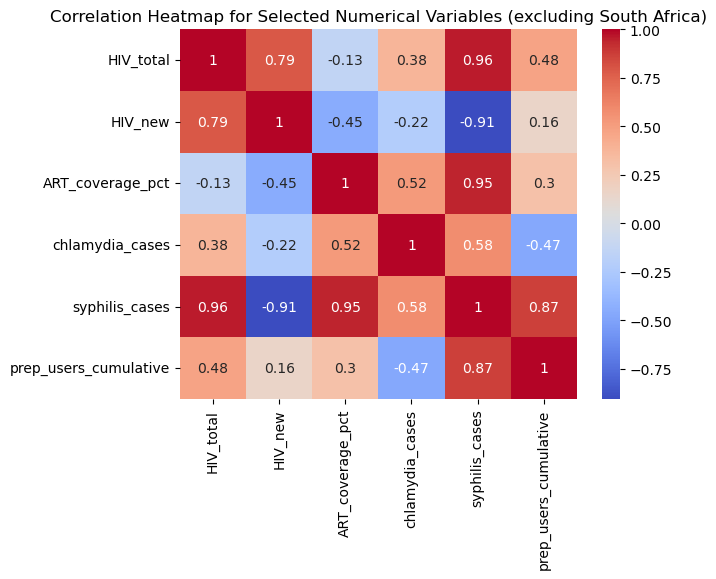

In [89]:
df_exc_sa = df[df["country"]!="South Africa"]
df_numerical_exc_sa = df_exc_sa[["HIV_total", "HIV_new", "ART_coverage_pct", "chlamydia_cases", "syphilis_cases", "prep_users_cumulative"]]
correlation_matrix = df_numerical_exc_sa.corr()

# Setting up the matplotlib figure with an appropriate size
#plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables (excluding South Africa)")
plt.show()

<Axes: xlabel='prep_users_cumulative', ylabel='HIV_total'>

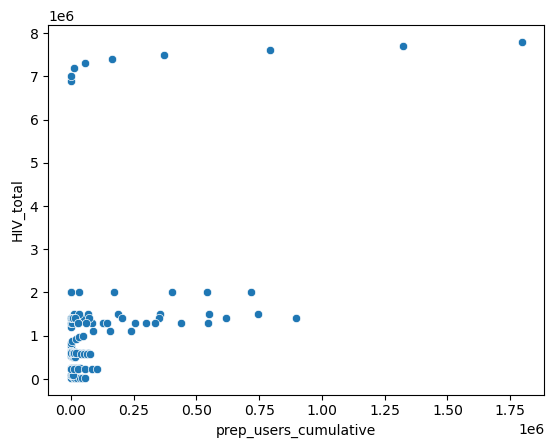

In [90]:
sns.scatterplot(data=df, x='prep_users_cumulative', y='HIV_total')

<Axes: xlabel='prep_users_cumulative', ylabel='HIV_new'>

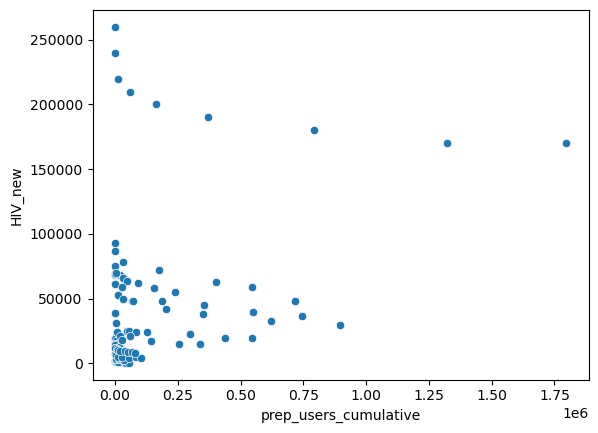

In [91]:
sns.scatterplot(data=df, x='prep_users_cumulative', y='HIV_new')

<Axes: xlabel='prep_users_cumulative', ylabel='chlamydia_cases'>

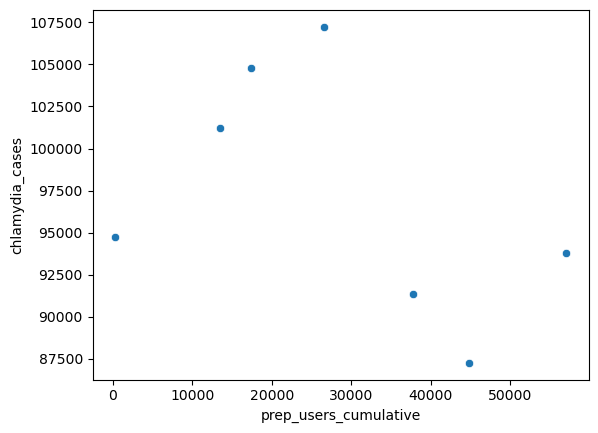

In [92]:
sns.scatterplot(data=df, x='prep_users_cumulative', y='chlamydia_cases')

<Axes: xlabel='prep_users_cumulative', ylabel='syphilis_cases'>

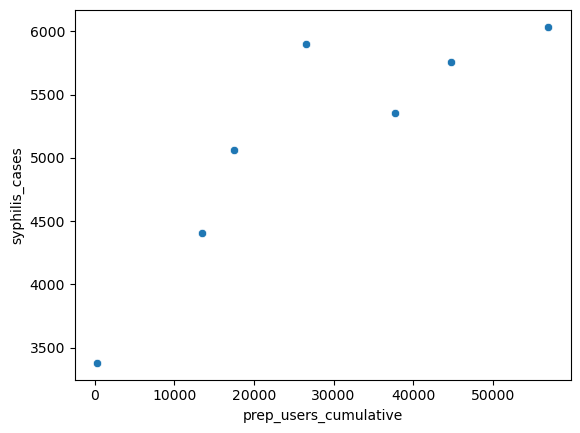

In [93]:
sns.scatterplot(data=df, x='prep_users_cumulative', y='syphilis_cases')

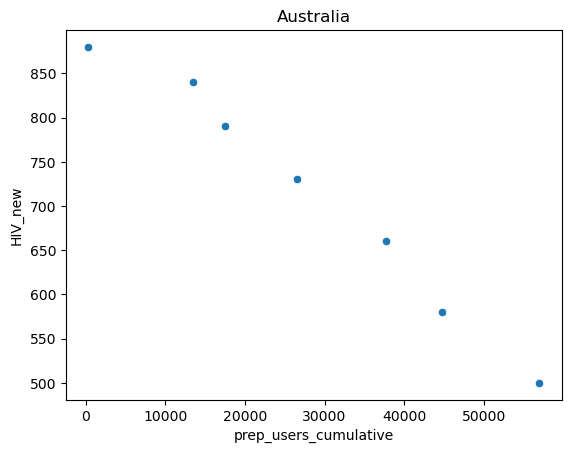

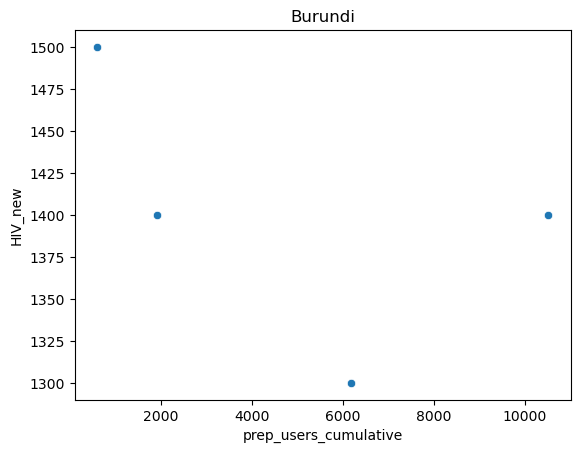

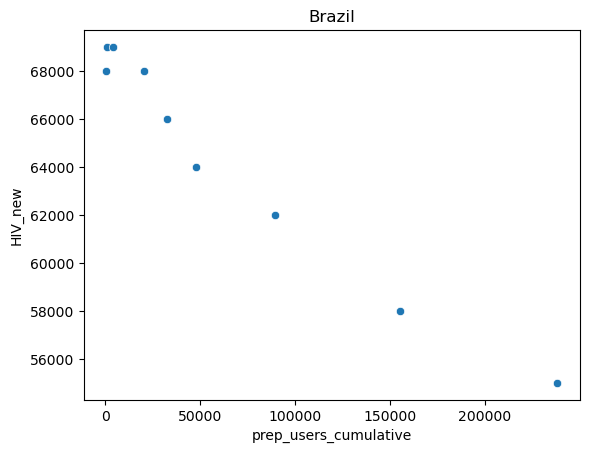

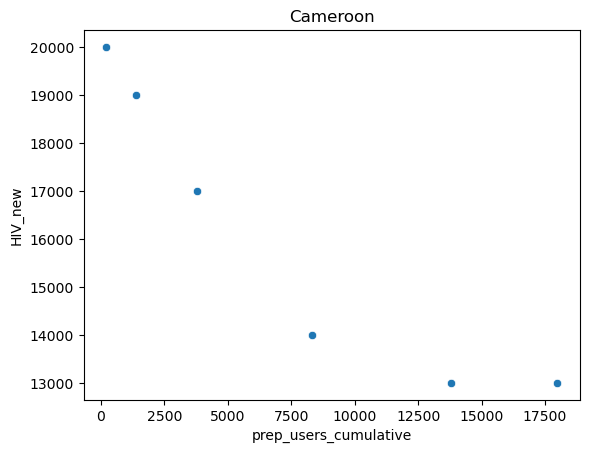

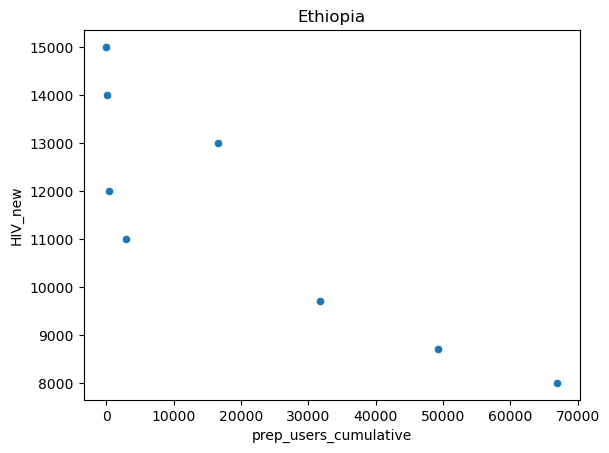

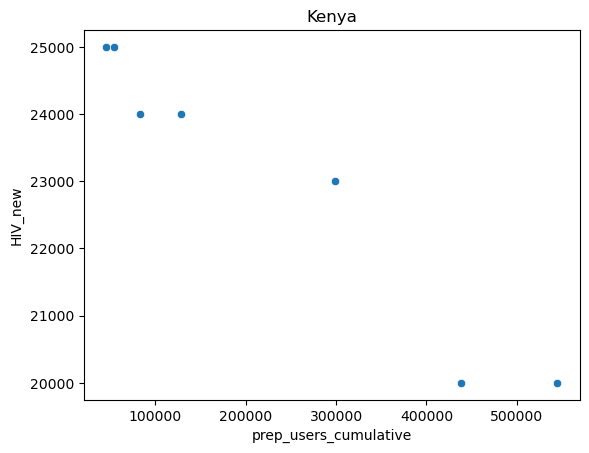

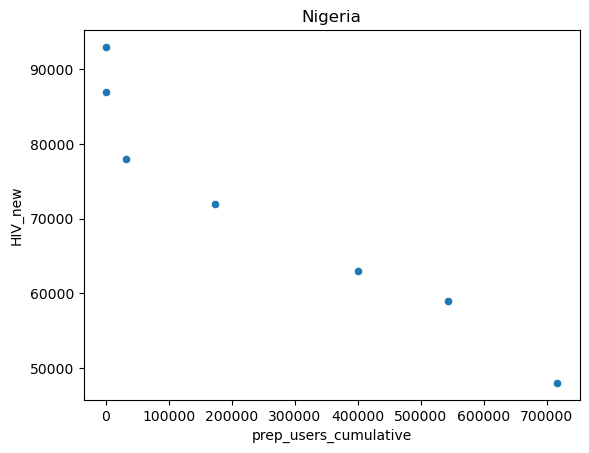

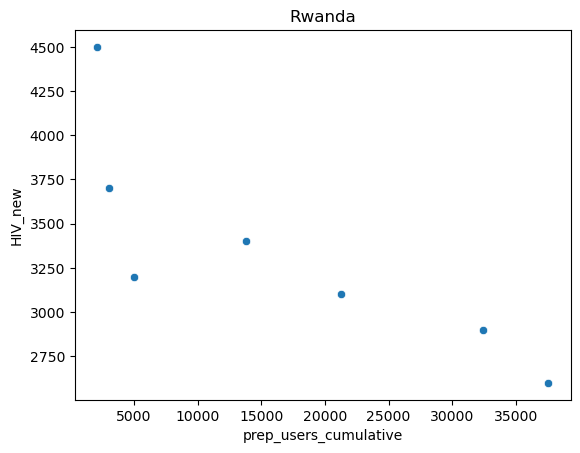

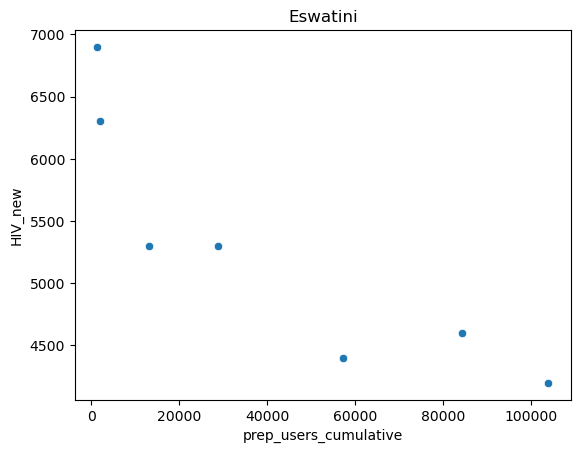

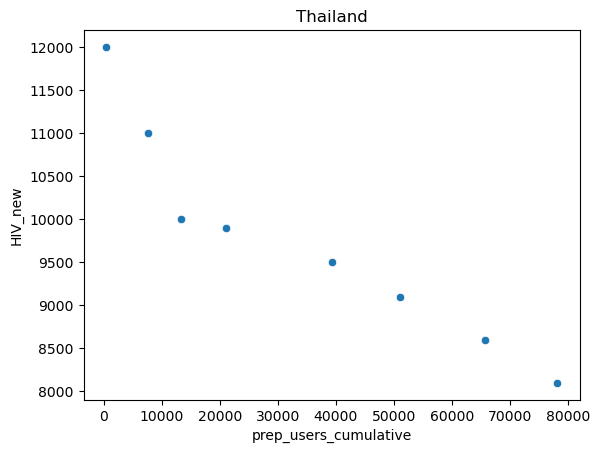

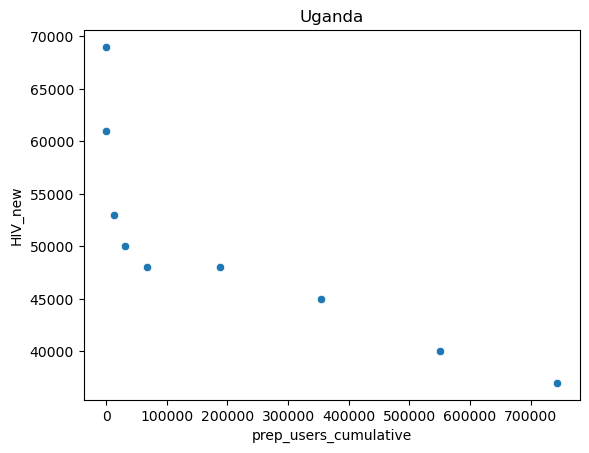

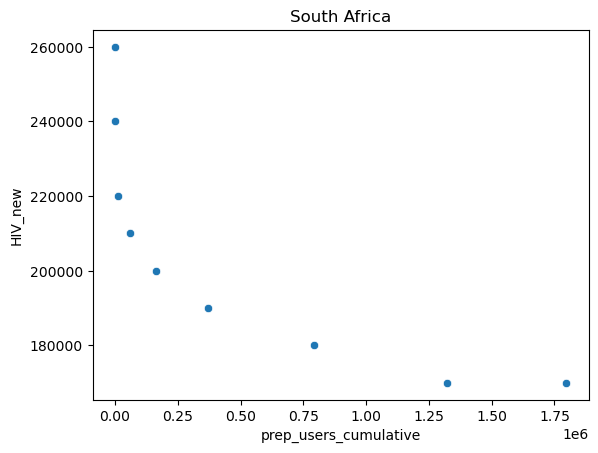

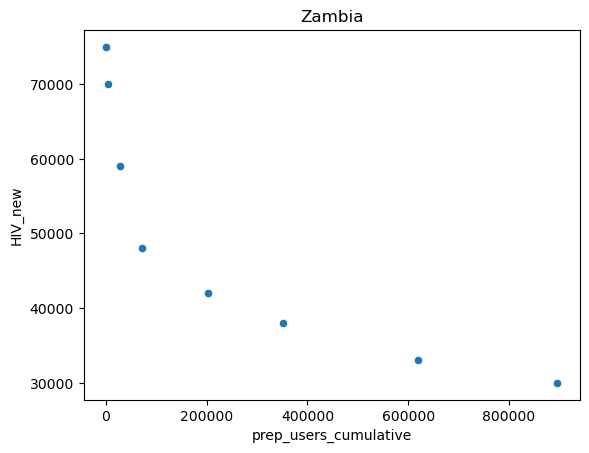

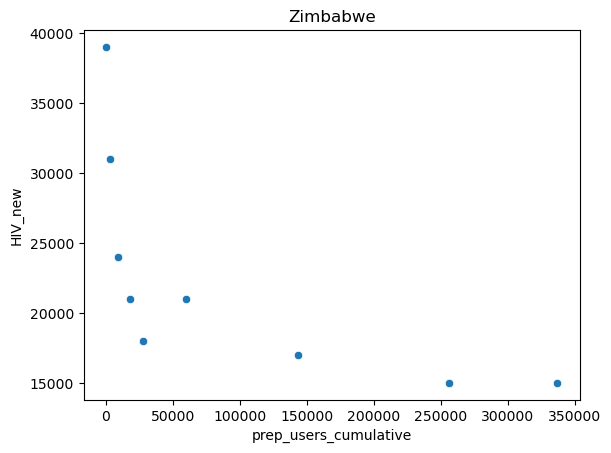

In [94]:
for country in df['country'].unique():
    sns.scatterplot(data=df[df['country']==country], x='prep_users_cumulative', y='HIV_new')
    plt.title(country)
    plt.show()